In [1]:
# Import required libraries
import os
from random import randint

import plotly.plotly as py
from plotly.graph_objs import *

import flask
import dash
import dash_core_components as dcc
import dash_html_components as html


# Setup the app
# Make sure not to change this file name or the variable names below,
# the template is configured to execute 'server' on 'app.py'
server = flask.Flask(__name__)
server.secret_key = os.environ.get('secret_key', str(randint(0, 1000000)))
app = dash.Dash(__name__, server=server)


import dash_katex

from dash.dependencies import Input, Output
import plotly.graph_objs as go
import plotly
import pandas as pd
import sympy
from sympy.printing.latex import latex


external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']

plotly.tools.set_credentials_file(username='benjoi', api_key='Xb6UHc1oqVrbbF0dYumQ')


def latex_out(sympyequation):
    return latex(sympyequation, order='old', long_frac_ratio = 1,mul_symbol='dot')

#'$$'+latex(sympyequation, order='old', long_frac_ratio = 1,mul_symbol='dot')+'$$'


def formula():
    """'MATHEMATIX'"""

    Empty = sympy.Symbol('')
    NMixing, NRemineralization, SiMixing, SiRemineralization, Gainsi, Lossesi, i, imax = \
    sympy.symbols('N_Mixing,N_Remineralisation,Si_Mixing,Si_Remineralization,Gains_i,Losses_i,i,i_max')

    K, k, M, Mt, hplus, h, t = sympy.symbols('K,kappa,M,M(t),h^{+}(t),h(t),t')
    N,N0,deltaD_N,D = sympy.symbols('N,N_0,delta_D^N,D')

    Pi, U_Ni, U_Sii, kw, PARt, OptI, one, z = \
        sympy.symbols('P_{i},U^{N}_i, U^{Si}_i, k_w, PAR(t), Opt^{I}_i, 1, z')

    ratioSi= \
        sympy.symbols('ratio^{Si}_i')

    I0, Iz, T = \
        sympy.symbols('I0,I_z,T')

    Si,Si0 = sympy.symbols('Si,Si_0')
    deltaD_Si = sympy.symbols('delta_D^Si')

    N_Uptake,Si_Uptake,LightHarvesting,TemperatureDepGrowth,NutrientUptake = \
    sympy.symbols('N^{Uptake}_i,Si^{Uptake}_i,LightHarvesting_i,TempDepGrowth_i,NutrientUptake_i')

    P_Grazingi, P_Mortalityi, P_Mixingi, P_Sinkingi = \
        sympy.symbols('P^Grazing_i,P^Mortality_i,P^Mixing_i,P^Sinking_i')
    Itot, pi, pij, R, moP, v, muP = \
        sympy.symbols('I^{tot}_j,p_i,p_i_j,R_j,mo^{P}_i,v,\mu^{P}_i')
    NMixing, deltaZ, moZ, muZ, kz = \
        sympy.symbols('N_Mixing,\delta_Z,mo^{Z}_j,\mu^{Z}_j,k_Z')

    Zj,j,jmax,Kz = \
    sympy.symbols('Z_j,j,j_max,K_Z')

    # MLD-dynamics
    # Material exchange between the two layers = K
    # MLD depth as function of time = M(t)
    # h+(t) is a function describing entrainment and detrainment
    # h(t) is derivtive of MLD depth
    # k is constant mixing parameter
    Kmix = (k+hplus)/Mt
    ht = sympy.Derivative(Mt,t)
    hplust = sympy.Max(ht,0)
    K_EQ = (k+hplus)/Mt
    # For Zooplankton, K is given as K_Z = h(t) - actively maintain wihtin upper ML
    K_Z = ht/Mt

    # Nitrate
    # δD is the mineralization rate and
    # N0 is the nitrogen concentration below the upper mixed layer
    dNdt = sympy.Derivative(N, t)
    dSidt = sympy.Derivative(Si, t)
    dPdt = sympy.Derivative(Pi, t)
    dZdt = sympy.Derivative(Zj, t)
    dDdt = sympy.Derivative(D, t)

    NRemineralization_EQ = deltaD_N * D
    NMixing_EQ = K * (N0 - N)
    SiRemineralization_EQ = deltaD_Si * D
    SiMixing_EQ = K * (Si0 - Si)

    # Phytoplankton
    # The equation describing the fitness functions of each functional type i is thus given by
    # where µP indicates the maximum growth rate and F(T) = e0.063·T is Eppley’s formulation
    # for temperature-dependent growth (Eppley, 1972).
    # The light-limiting term, H(I), represents the total light I available in
    # the upper mixed layer. According to Steele’s formulation (Steele, 1962)

    N_Uptake_EQ = N / (N + U_Ni)
    Si_Uptake_EQ = Si / (Si + U_Sii)

    LightHarvesting_EQ = (one / ((kw * Mt))) * \
        (sympy.exp(one - PARt/OptI) - (- sympy.exp(one - (PARt * sympy.exp(-kw*Mt)) / OptI)))


    Iz_EQ = I0 * sympy.exp(-kw*z)
    Steele_EQ = (one/Mt * sympy.Integral(Iz/OptI * sympy.exp(1-Iz/OptI),(z,0,M)))

    TemperatureDepGrowth_EQ = sympy.exp(0.063*T)

    # F(T) = TempDep
    # H(I) = LightHarv
    U_N_Si = r'\begin{cases}'+ latex_out(sympy.Min(N_Uptake_EQ, Si_Uptake_EQ))+r',& \text{if P-type is Diatom}\\'+latex_out(N_Uptake_EQ)+r', & \text{otherwise}\end{cases}'

    # 'Gains' = µ_P * F(T) * H(I) * U(N,Si) * P_i

    P_Grazing = Itot * (pi*Pi/R)
    P_Grazingtex = latex_out(Itot) + r'⋅\frac{' + latex_out(pij) + r'⋅' + latex_out(Pi) + r'}{' + latex_out(R) + r'}'

    P_Mortality = moP * Pi
    P_Mortalitytex  = latex_out(moP) + r'⋅' + latex_out(Pi)
    P_MortalitySumtex = latex_out(sympy.Sum(Empty,(i, 1, imax)))+r'('+latex_out(moP)+r'⋅'+latex_out(Pi)+r')'

    P_Mixing = K * Pi
    P_Sinking = v / Mt * Pi
    P_Sinkingtex = latex_out(v / Mt)+r'⋅'+ latex_out(Pi)

    Gains_EQ = (sympy.Min(N_Uptake_EQ, Si_Uptake_EQ) + LightHarvesting_EQ + TemperatureDepGrowth_EQ) * Pi
    Gains = latex_out(sympy.Sum(Empty,(i, 1, imax)))+r'['+latex_out(muP)+r'⋅'+latex_out(NutrientUptake)+\
            r'⋅'+latex_out(LightHarvesting * TemperatureDepGrowth)+r'⋅'+latex_out(Pi) +r']'
    Gains_i = latex_out(muP) + r'⋅' + latex_out(NutrientUptake) + \
            r'⋅' + latex_out(LightHarvesting * TemperatureDepGrowth) + r'⋅' + latex_out(Pi)
    GainsSiLeft = latex_out(sympy.Sum(Empty, (i, 1, imax))) + r'[' + latex_out(muP) + r'⋅' + latex_out(NutrientUptake) + \
            r'⋅' + latex_out(LightHarvesting * TemperatureDepGrowth) + r'⋅' + latex_out(Pi) + r'...'
    GainsSiRight = r'...' + r'⋅' + latex_out(ratioSi) + r']'

    P_GrazingSum = latex_out(sympy.Sum(Empty,(j, 1, jmax)))+r'['+P_Grazingtex +r'⋅'+latex_out(Zj)+r']'  # Follows * Z instead * P

    Itot_EQ = muZ * (R / (kz + R))
    Itot_EQtex = latex_out(muZ)+r'⋅'+latex_out(R / (kz + R))
    R_EQ = sympy.Sum(pi * Pi, (i, 1, imax))
    P_R_EQtex = latex_out(sympy.Sum(Empty,(i, 1, imax)))+r'('+latex_out(pij)+r'⋅'+latex_out(Pi)+r')'
    R_EQtex = latex_out(sympy.Sum(Empty,(i, 1, imax)))+r'('+latex_out(pi)+r'⋅'+latex_out(Pi)+r')'


    # ZOOPLANKTON
    AssimGrazing = deltaZ * Itot * Zj #* Pi
    AssimGrazingtex = latex_out(deltaZ)+r'⋅'+latex_out(Itot)+r'⋅'+latex_out(Zj)  #+r'⋅'#latex_out(Pi)
    UnassimGrazingtex = latex_out(sympy.Sum(Empty,(j, 1, jmax)))+r'['+r'(1-'+latex_out(deltaZ)+r')⋅'+latex_out(Itot)+r'⋅'+latex_out(Zj)+r']'#latex_out(Pi)+r'⋅'+

    ZooGrowth = Itot * deltaZ
    ZooMortality = moZ * Zj ** 2
    ZooMortalitytex = latex_out(moZ)+r'⋅'+latex_out(Zj)+r'^2'
    ZooMortalitytexfix = latex_out(moZ)+r'('+latex_out(sympy.Sum(Empty,(j, 1, jmax)))+latex_out(Zj)+r')'+r'^2'+r'⋅\frac{1}{'+latex_out(jmax)+'}'
    ZooMortalitySumtex = latex_out(moZ)+r'('+latex_out(sympy.Sum(Empty,(j, 1, jmax)))+latex_out(Zj)+r')'+r'^2'

    ZooMixing = K_Z * Zj
    ZooMixingtex = latex_out(Kz)+r'⋅'+latex_out(Zj)
    Zoo = ZooGrowth - ZooMortality - ZooMixing


    # Detritus DETRITUS DETRITUS DETRITUS DETRITUS
    # Detritus = sum(ZooMortality) + sum(UnassimilatedProduction) + sum(PhytoMortality)
    # - NRemineralization - SiRemineralization - DetritusMixing   # Detritus
    UnassimilatedProduction = Itot * (1 - deltaZ)
    PhytoMortality = P_Mortality * Pi
    DetritusMixing_EQ = K * D

    Detritus = sympy.Sum(ZooMortality+UnassimilatedProduction,(j,1,jmax)) + \
    sympy.Sum(PhytoMortality,(i,1,imax)) - NRemineralization_EQ - SiRemineralization_EQ - DetritusMixing_EQ

    Losses_EQ = P_Grazing + P_Mortality + P_Mixing + P_Sinking
    Losses = P_Grazingi + P_Mortalityi + P_Mixingi + P_Sinkingi

    Phy = (Gainsi - Lossesi)*Pi

    Nitrate = NMixing + NRemineralization - sympy.Sum(Gainsi, (i,1,imax))
    Silicate = SiMixing + SiRemineralization - sympy.Sum(Gainsi, (i,1,imax))

    # where Is is the light level at which photosynthesis saturates and
    # I(z) is the irradiance at depth z.
    # The exponential decay of light with depth is computed according to the Beer– Lambert law
    # with a generic extinction coefficient kw

    # The current version of our model does not specify any size dependence for light absorption,
    # although we provided sug- gestions on how this could be done (Sects. 4 and 6).
    # The nutrient-limiting term U in Eq. (3) is determined by a Monod function
    # with a half-saturation constant KN, which scales allometrically
    # with phytoplankton cell size L (Litch- man et al., 2007),

    # with βU and αU, respectively, intercept and slope of the KN allometric function
    # (i.e. the power law βU ·SαU).
    # This empirical relationship is based on observations of different
    # phytoplankton groups (see Fig. 3b in Litchman et al., 2007),
    # with the regression parameters rescaled from cell volume to ESD.
    # The loss term G(Li ,Pi ) in Eq. (3) represents zooplankton grazing. As

    # The loss term V(Li ,M) in Eq. (3) represents the sinking
    # of phytoplankton as a function of size and depth of the mixed layer,


    # so I should set up the dataframe now, with all used parts of the equation..
    #
    distanceY = [0,0.15,0.3,0.45,0.6]
    distanceX = [1, 1.7, 2.5,3.3,3.9,4.5,5.1,5.65,6.,6.35,6.75,7.15,7.5]
    NitrateUnit = r'Unit\ :\ [µM \ N \ day^{-1}]'
    SilicateUnit = r'Unit\ :\ [µM \ Si \ day^{-1}]'
    equal = '='
    plus = '+'
    minus = '-'
    times = '⋅'
    # initialize List of List of all relevant ormula and parameters
    formulaframe = [['Nitrogen', latex_out(dNdt), NitrateUnit,distanceX[0],distanceY[0],'','','','','',''],
                    [equal,'','',distanceX[1],distanceY[0],'','','','','',''],
    ['Mixing<sup>N</sup>',latex_out(NMixing_EQ), NitrateUnit,distanceX[2],distanceY[0],'K =',latex_out(K_EQ),latex_out(hplus)+'=',latex_out(hplust),'',''],
                    [plus, '', '', distanceX[3], distanceY[0], '', '', '', '', '', ''],
    ['Remin<sup>N</sup>',latex_out(NRemineralization_EQ),NitrateUnit, distanceX[4], distanceY[0],'','','','','',''],
                    [minus, '', '', distanceX[5], distanceY[0], '', '', '', '', '', ''],
    ['Σ<sub>i</sub>[Gains<sub>i</sub><sup>P</sup>]', Gains, NitrateUnit, distanceX[6], distanceY[0],latex_out(NutrientUptake)+' =',U_N_Si,latex_out(LightHarvesting)+' =',
     latex_out(LightHarvesting_EQ),latex_out(TemperatureDepGrowth)+' =',latex_out(TemperatureDepGrowth_EQ)],
    # SILICATE
    ['Silicate', latex_out(dSidt), SilicateUnit, distanceX[0], distanceY[1],'','','','','',''],
    [equal, '', '', distanceX[1], distanceY[1], '', '', '', '', '', ''],
    ['Mixing<sup>Si</sup>', latex_out(SiMixing_EQ), SilicateUnit, distanceX[2], distanceY[1],'K =',latex_out(K_EQ),latex_out(hplus)+'=',latex_out(hplust),'',''],
                    [plus, '', '', distanceX[3], distanceY[1], '', '', '', '', '', ''],
    ['Remin<sup>Si</sup>', latex_out(SiRemineralization_EQ), SilicateUnit, distanceX[4], distanceY[1], '', '', '','','',''],
                    [minus, '', '', distanceX[5], distanceY[1], '', '', '', '', '', ''],
    ['Σ<sub>i</sub>[Gains<sub>i</sub><sup>P</sup> ', GainsSiLeft, NitrateUnit, distanceX[6], distanceY[1], latex_out(NutrientUptake) + ' =',
     U_N_Si, latex_out(LightHarvesting) + ' =',
     latex_out(LightHarvesting_EQ), latex_out(TemperatureDepGrowth) + ' =',
     latex_out(TemperatureDepGrowth_EQ)],
                    [times, '', '', distanceX[7], distanceY[1], '', '', '', '', '', ''],
    ['ratio<sub>i</sub><sup>Si</sup>]', GainsSiRight, '[µM \ Si \ N^{-1}]', distanceX[8], distanceY[1],'','','','','',''], #check
    # PHYTO
    ['Phytoplankton<sub>i</sub>', latex_out(dPdt), NitrateUnit, distanceX[0], distanceY[2],'','','','','',''],
    [equal, '', '', distanceX[1], distanceY[2], '', '', '', '', '', ''],
    ['Gains<sub>i</sub><sup>P</sup>', Gains_i, NitrateUnit, distanceX[2], distanceY[2],
     latex_out(NutrientUptake) + ' =', U_N_Si, latex_out(LightHarvesting) + ' =',
     latex_out(LightHarvesting_EQ), latex_out(TemperatureDepGrowth) + ' =', latex_out(TemperatureDepGrowth_EQ)],
    [minus, '', '', distanceX[3], distanceY[2], '', '', '', '', '', ''],
    ['Σ<sub>j</sub>[Grazing<sub>i</sub><sup>Z<sub>j</sub></sup>]', P_GrazingSum, NitrateUnit, distanceX[4], distanceY[2],latex_out(Itot)+'=',latex_out(Itot_EQtex),latex_out(R)+'=',P_R_EQtex,'',''],
    [minus, '', '', distanceX[5], distanceY[2], '', '', '', '', '', ''],
    ['Sinking<sub>i</sub><sup>P</sup>',P_Sinkingtex,NitrateUnit,distanceX[6],distanceY[2],'','','','','',''],
    [minus, '', '', distanceX[7], distanceY[2],'', '', '', '','',''],
    ['Mixing<sub>i</sub><sup>P</sup>', latex_out(P_Mixing), NitrateUnit, distanceX[8], distanceY[2],'K =',latex_out(K_EQ),latex_out(hplus)+'=',latex_out(hplust),'',''],
    [minus, '', '', distanceX[9], distanceY[2],'', '', '', '','',''],
    ['Mortality<sub>i</sub><sup>P</sup>', P_Mortalitytex, NitrateUnit, distanceX[10], distanceY[2],'', '', '', '','',''],

    # ZOOPLANKTON
    ['Zooplankton<sub>j</sub>', latex_out(dZdt), NitrateUnit, distanceX[0], distanceY[3],'','','','','',''],
    [equal, '', '', distanceX[1], distanceY[3], '', '', '', '', '', ''],
    ['AssimGrazing<sub>j</sub><sup>Z</sup>',AssimGrazingtex, NitrateUnit, distanceX[2], distanceY[3],latex_out(Itot)+r'=',Itot_EQtex,latex_out(R)+'=',R_EQtex,'',''],
    [minus, '', '', distanceX[3], distanceY[3], '', '', '', '', '', ''],
    ['Mixing<sub>j</sub><sup>Z</sup>', ZooMixingtex, NitrateUnit, distanceX[4], distanceY[3],latex_out(Kz)+r'=',latex_out(K_Z),'','','',''],
    [minus, '', '', distanceX[5], distanceY[3], '', '', '', '', '', ''],
    ['Mortality<sub>j</sub><sup>Z</sup>',ZooMortalitytexfix,NitrateUnit,distanceX[6],distanceY[3],'','','','','',''],

    # Detritus
    ['Detritus', latex_out(dDdt), NitrateUnit, distanceX[0], distanceY[4],'','','','','',''],
    [equal, '', '', distanceX[1], distanceY[4], '', '', '', '', '', ''],
    ['Σ<sub>j</sub>[UnassimGrazing<sub>j</sub><sup>Z</sup>]',UnassimGrazingtex, NitrateUnit, distanceX[2], distanceY[4],latex_out(Itot)+r'=',Itot_EQtex,latex_out(R)+'=',R_EQtex,'',''],
    [plus, '', '', distanceX[3], distanceY[4], '', '', '', '', '', ''],
    ['Σ<sub>j</sub>[Mortality<sub>j</sub><sup>Z</sup>]', ZooMortalitySumtex, NitrateUnit, distanceX[4], distanceY[4],'','','','','',''],
    [plus, '', '', distanceX[5], distanceY[4], '', '', '', '', '', ''],
    ['Σ<sub>i</sub>[Mortality<sub>i</sub><sup>P</sup>]',P_MortalitySumtex,NitrateUnit,distanceX[6],distanceY[4],'','','','','',''],
    [minus, '', '', distanceX[7], distanceY[4], '', '', '', '', '', ''],
    ['Remin<sup>N</sup>', latex_out(NRemineralization_EQ), NitrateUnit, distanceX[8],distanceY[4], '', '', '', '', '', ''],
    [minus, '', '', distanceX[9], distanceY[4], '', '', '', '', '', ''],
    ['Remin<sup>Si</sup>', latex_out(SiRemineralization_EQ), SilicateUnit, distanceX[10], distanceY[4], '', '', '','','',''],
    [minus, '', '', distanceX[11], distanceY[4], '', '', '', '', '', ''],
    ['Mixing<sup>D</sup>', latex_out(DetritusMixing_EQ), NitrateUnit, distanceX[12], distanceY[4],'K =',latex_out(K_EQ),latex_out(hplus)+'=',latex_out(hplust),'',''],



    ['', '', '', 10, 1, '', '', '', '','','']]




    # Create the pandas DataFrame
    df = pd.DataFrame(formulaframe, columns=['Text', 'Formula', 'Unit','x','y', 'var_1','form_1','var_2','form_2','var_3','form_3'])

    return df

#' TODO:
#' so #1 I need all the equations, as simply the process names, and additionally the actual mathmatical formula!
#' this should be stored inside a pandas dataframe, so that I can be dynamically calles by the dash app
#' now I have to start implementing that!
#'

dfmath = formula()


app = dash.Dash(__name__, external_stylesheets=external_stylesheets)
server = app.server

app.layout = html.Div([
    html.H1('PhytoMFTM - System of Equations'),
    html.H3('Hover over part of equation to reveal detailed formulation'),

    dcc.Graph(id='table', figure={
        'data': [{
            'x': dfmath['x'],
            'y': dfmath['y'],
            'text':dfmath['Text'],
            'mode':'text',
            #'marker': {'size': 18},
            'hoverinfo':'none',
            'customdata': dfmath['Formula'],
            'textfont' : {'size':28},
            'textposition':'center'
        }],
        'layout': go.Layout(
            showlegend=False,
            autosize=False,
            width=2000,
            xaxis={'zeroline': False,
                'showgrid': False,
                'ticks': '',
                'title': '',
                'showticklabels': False},
                #'range':[0, 8]},
            yaxis={'showgrid': False,
                'showline': False,
                'zeroline': False,
                'autorange': 'reversed',
                'ticks': '',
                'showticklabels': False,
                'title':'',
                'range':[0, 5]},
            hovermode='closest',
            hoverdistance=50,
            margin={'l': 0, 'r': 0, 'b': 0, 't': 0}),

    },
        config={'displayModeBar': False},
        style={"height" : "50vh", "width" : "80vh"}),
    #html.Div(dash_katex.DashKatex()),
    html.H1(id='text-content', style={'text-align': 'center'})

])


@app.callback(
    dash.dependencies.Output('text-content', 'children'),
    [dash.dependencies.Input('table', 'hoverData')])
def update_text(hoverData):
    if hoverData is None:
        return 'HI'
    else:
        s = dfmath[dfmath['Formula'] == hoverData['points'][0]['customdata']]
        return dash_katex.DashKatex(expression=r'{} \\ \tiny {} {} \\ {} {} \\ {} {} \\ {}'.format(
            s.iloc[0]['Formula'],
            s.iloc[0]['var_1'],
            s.iloc[0]['form_1'],
            s.iloc[0]['var_2'],
            s.iloc[0]['form_2'],
            s.iloc[0]['var_3'],
            s.iloc[0]['form_3'],
            s.iloc[0]['Unit']))


# Run the Dash app
if __name__ == '__main__':
    app.server.run(debug=True, threaded=True)


ModuleNotFoundError: No module named 'dash_katex'

In [1]:
import sympy
from sympy.printing.latex import latex
from sympy.printing import pretty
from sympy import init_printing
import matplotlib.pyplot as plt
#init_printing(use_latex="mathjax") # doctest: +SKIP
sympy.init_printing(use_latex='mathjax')

In [2]:
# make all plots larger and more visible on dark background:
plt.rcParams['figure.figsize'] = [7, 6]
plt.rc_context({'axes.edgecolor':'black', 'xtick.color':'black', 'ytick.color':'black', 'figure.facecolor':'white'})

plt.rcParams['figure.dpi']= 300

In [3]:
def latex_out(sympyequation):
    return '$'+latex(sympyequation, order='old', long_frac_ratio = 1,mul_symbol='dot')+'$'

In [6]:
# MLD-dynamics
# Material exchange between the two layers = K
# MLD depth as function of time = M(t)
# h+(t) is a function describing entrainment and detrainment
# h(t) is derivtive of MLD depth
# k is constant mixing parameter
K, k, M, Mt, hplus, h, t = sympy.symbols('K,kappa,M,M(t),h^{+}(t),h(t),t')
Kmix = (k+hplus)/Mt
hplust = sympy.Max(h,0)
ht = sympy.Derivative(Mt,t)
K_EQ = (k+sympy.Max(ht,0))/Mt
# For Zooplankton, K is given as K_Z = h(t) - actively maintain wihtin upper ML
K_Z = ht/Mt

# Nitrate
# δD is the mineralization rate and 
# N0 is the nitrogen concentration below the upper mixed layer
Nt,N0,deltaD_N,Dt = sympy.symbols('N(t),N_0,delta_D^N,D(t)')
Sit,Si0 = sympy.symbols('Si(t),Si_0')
deltaD_Si = sympy.symbols('delta_D^Si')

NRemineralization_EQ = deltaD_N * Dt
NMixing_EQ = K * (N0 - Nt)
SiRemineralization_EQ = deltaD_Si * Dt
SiMixing_EQ = K * (Si0 - Sit)

# Phytoplankton
# The equation describing the fitness functions of each functional type i is thus given by
# where µP indicates the maximum growth rate and F(T) = e0.063·T is Eppley’s formulation 
# for temperature-dependent growth (Eppley, 1972). 
# The light-limiting term, H(I), represents the total light I available in 
# the upper mixed layer. According to Steele’s formulation (Steele, 1962)
Pti, U_Ni, U_Sii, kw, PARt, OptI, one, z = \
sympy.symbols('P_{i}(t),U^{N}_i, U^{Si}_i, k_w, PAR(t), Opt^{I}_i, 1, z')

N_Uptake_EQ = Nt / (Nt + U_Ni)
Si_Uptake_EQ = Sit / (Sit + U_Sii)

LightHarvesting_EQ = (one / ((kw * Mt))) * \
    (sympy.exp(one - PARt/OptI) - (- sympy.exp(one - (PARt * sympy.exp(-kw*Mt)) / OptI)))

I0,Iz,T = \
sympy.symbols('I0,I_z,T')

Iz_EQ = I0 * sympy.exp(-kw*z)
Steele_EQ = (one/Mt * sympy.Integral(Iz/OptI * sympy.exp(1-Iz/OptI),(z,0,M)))

TemperatureDepGrowth_EQ = sympy.exp(0.063*T)

N_Uptake,Si_Uptake,LightHarvesting = \
sympy.symbols('N_Uptake,Si_Uptake,LightHarvesting')

Gains_EQ = (sympy.Min(N_Uptake_EQ, Si_Uptake_EQ)+ LightHarvesting_EQ + TemperatureDepGrowth_EQ) * Pti
Gains = sympy.Min(N_Uptake_EQ, Si_Uptake_EQ)+ LightHarvesting + TemperatureDepGrowth_EQ

P_Grazingi,P_Mortalityi,P_Mixingi,P_Sinkingi = \
sympy.symbols('P^Grazing_i,P^Mortality_i,P^Mixing_i,P^Sinking_i')
Itot,pi,R,moP,v = \
sympy.symbols('I_tot,p_i,R,mo_P,v')

P_Grazing = Itot * pi*Pti/R
P_Mortality = moP
P_Mixing = K
P_Sinking = v / Mt

NMixing,NRemineralization,SiMixing,SiRemineralization,Gainsi,Lossesi,i,imax = \
sympy.symbols('N_Mixing,N_Remineralisation,Si_Mixing,Si_Remineralization,Gains_i,Losses_i,i,i_max')

Losses_EQ = P_Grazing + P_Mortality + P_Mixing + P_Sinking
Losses = P_Grazingi + P_Mortalityi + P_Mixingi + P_Sinkingi

Phy = (Gainsi - Lossesi)*Pti

Nitrate = NMixing + NRemineralization - sympy.Sum(Gainsi, (i,1,imax))
Silicate = SiMixing + SiRemineralization - sympy.Sum(Gainsi, (i,1,imax))

# where Is is the light level at which photosynthesis saturates and 
# I(z) is the irradiance at depth z. 
# The exponential decay of light with depth is computed according to the Beer– Lambert law 
# with a generic extinction coefficient kw

# The current version of our model does not specify any size dependence for light absorption,
# although we provided sug- gestions on how this could be done (Sects. 4 and 6). 
# The nutrient-limiting term U in Eq. (3) is determined by a Monod function 
# with a half-saturation constant KN, which scales allometrically 
# with phytoplankton cell size L (Litch- man et al., 2007),

# with βU and αU, respectively, intercept and slope of the KN allometric function 
# (i.e. the power law βU ·SαU). 
# This empirical relationship is based on observations of different 
# phytoplankton groups (see Fig. 3b in Litchman et al., 2007), 
# with the regression parameters rescaled from cell volume to ESD. 
# The loss term G(Li ,Pi ) in Eq. (3) represents zooplankton grazing. As

# The loss term V(Li ,M) in Eq. (3) represents the sinking
# of phytoplankton as a function of size and depth of the mixed layer,

# ZOOPLANKTON
NMixing,deltaZ,moZ,Z_j,muZ,kz = \
sympy.symbols('N_Mixing,delta_Z,mo_Z,Z_j,mu_Z,k_Z')

ZooGrowth = Itot * deltaZ
ZooMortality = moZ * Z_j ** 2
ZooMixing = K_Z
Zoo = ZooGrowth - ZooMortality - ZooMixing
Itot_EQ = muZ * (R / (kz + R))
R_EQ = sympy.Sum(pi*Pti, (i,1,imax))

# Detritus DETRITUS DETRITUS DETRITUS DETRITUS
# Detritus = sum(ZooMortality) + sum(UnassimilatedProduction) + sum(PhytoMortality) 
# - NRemineralization - SiRemineralization - DetritusMixing   # Detritus
j,jmax = \
sympy.symbols('j,j_max')

UnassimilatedProduction = Itot * (1 - deltaZ)
PhytoMortality = P_Mortality * Pti
DetritusMixing_EQ = K * Dt

Detritus = sympy.Sum(ZooMortality+UnassimilatedProduction,(j,1,jmax)) + \
sympy.Sum(PhytoMortality,(i,1,imax)) - NRemineralization_EQ - SiRemineralization_EQ - DetritusMixing_EQ

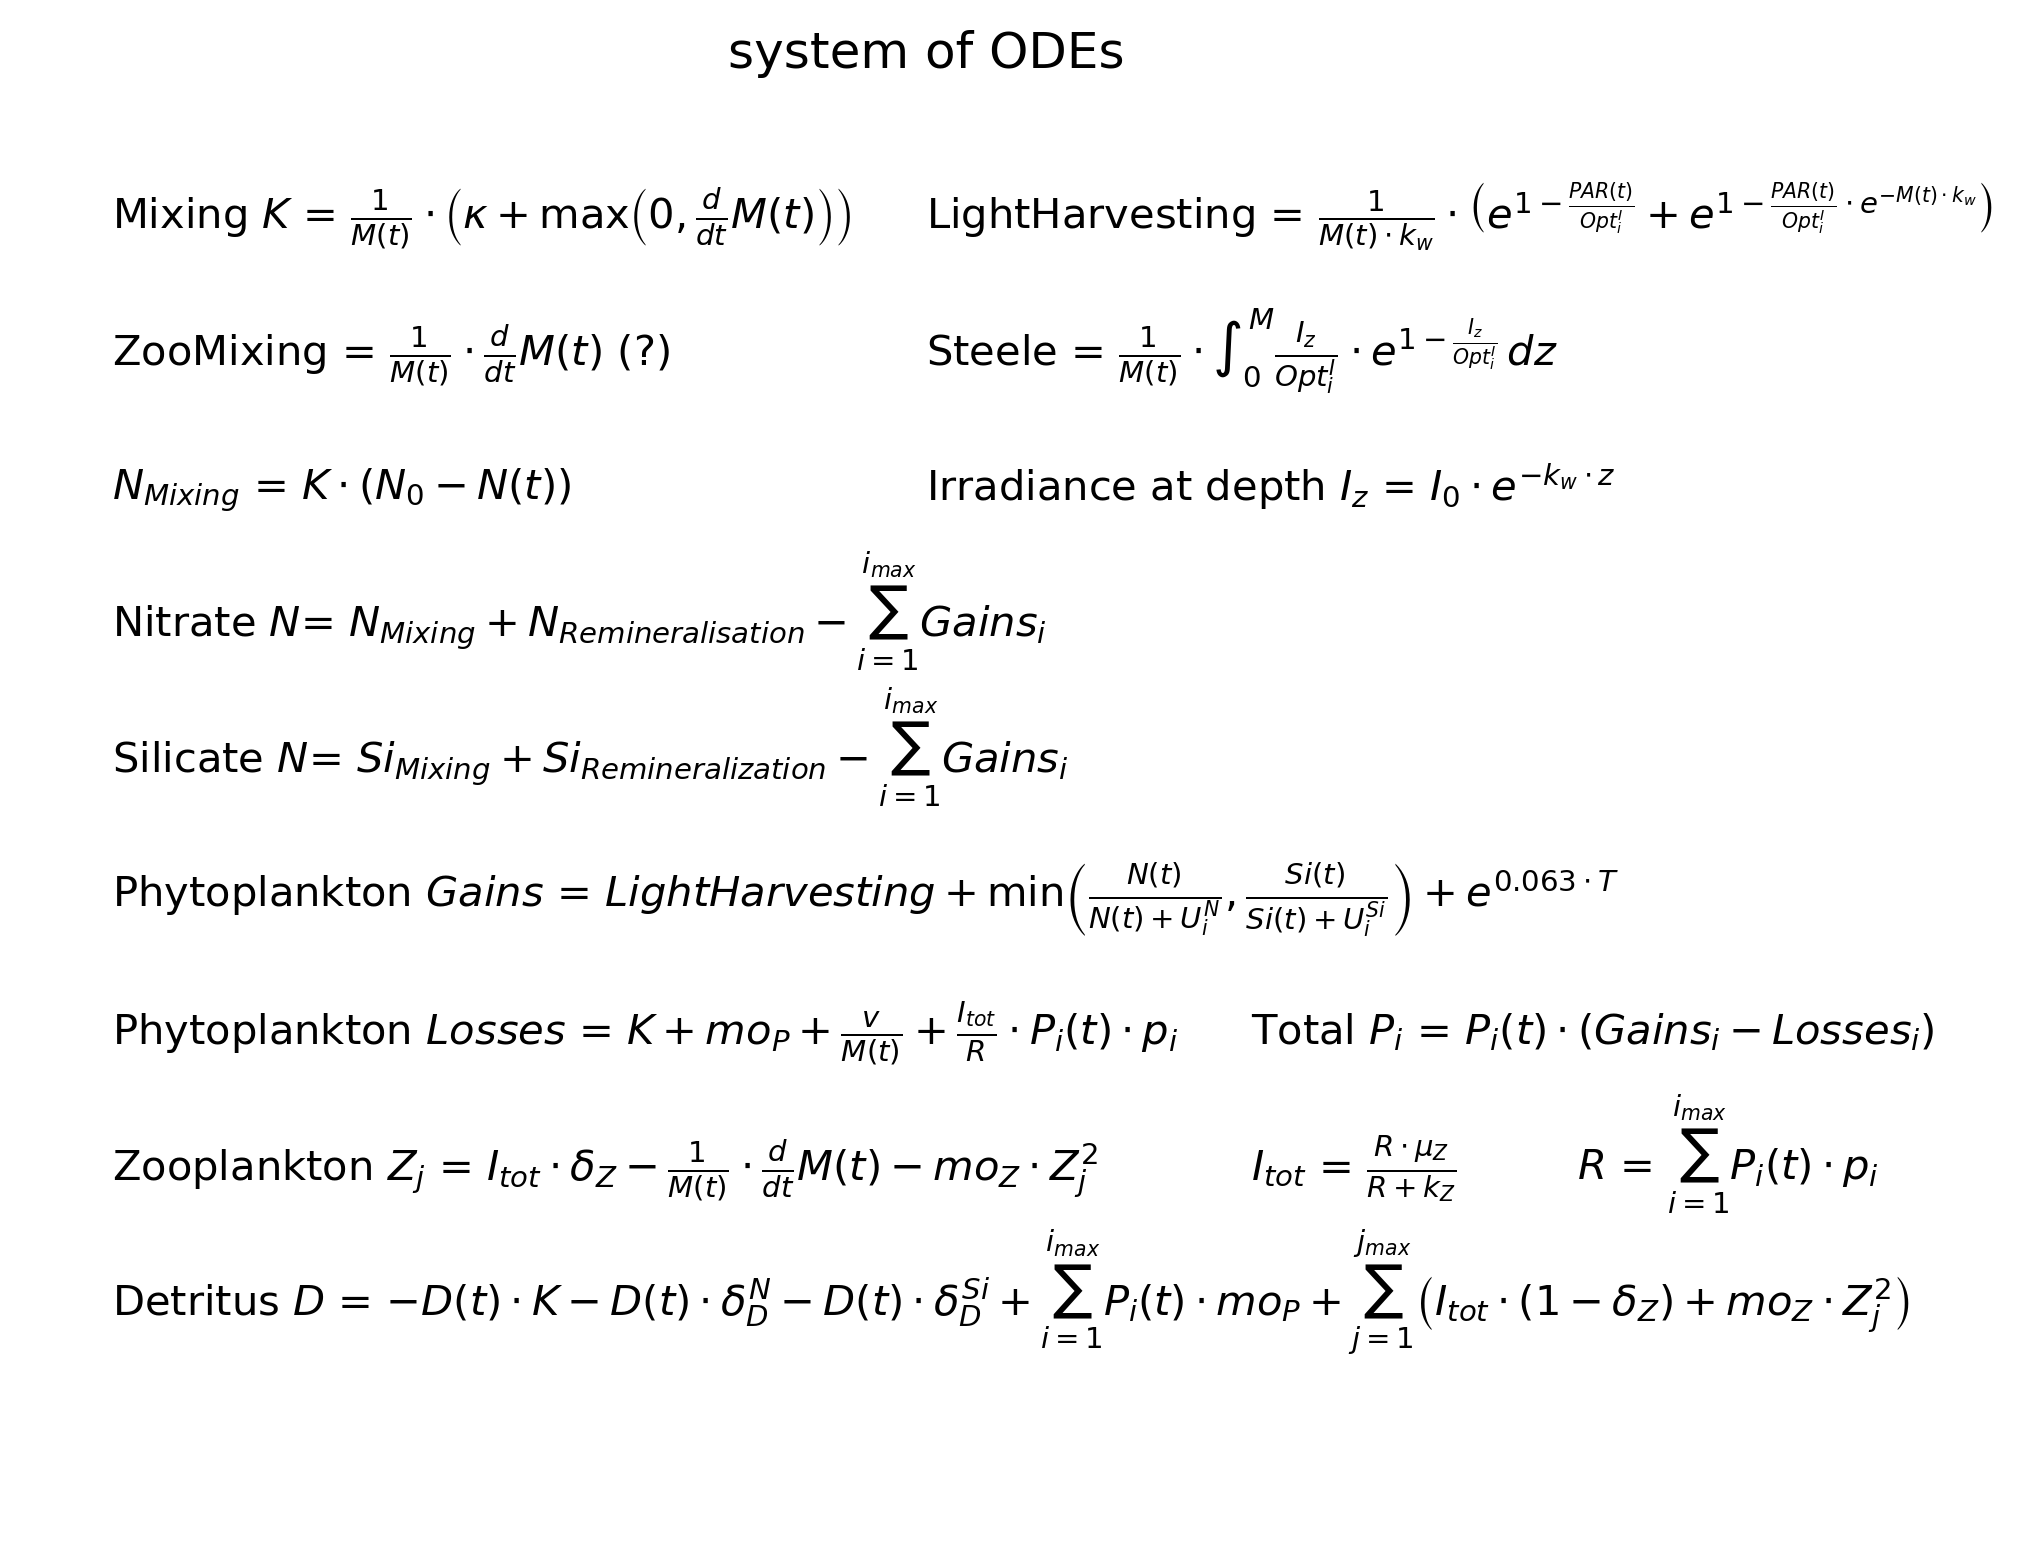

In [8]:
import numpy as np
import matplotlib.pyplot as plt
#plt.rc('text', usetex=True)

odes = plt.figure()
ax1 = odes.add_subplot(111)

ax1.set_ylim(0,10)
ax1.set_xlim(0,10)
ax1.axis('off')
ax1.set_title('system of ODEs')
#plt.ylabel(r'\textit{voltage} (mV)',fontsize=16)
ax1.text(s='Mixing $K$ = ' + latex_out(K_EQ), x=0,y=9,size=10)
ax1.text(s='ZooMixing = ' + latex_out(K_Z) + ' (?)', x=0,y=8,size=10)
ax1.text(s='$N_{Mixing}$ = ' + latex_out(NMixing_EQ), x=0,y=7,size=10)
ax1.text(s=r'Nitrate $N$= ' + latex_out(Nitrate), x=0,y=6,size=10)
ax1.text(s=r'Silicate $N$= ' + latex_out(Silicate), x=0,y=5,size=10)

ax1.text(s='LightHarvesting = ' + latex_out(LightHarvesting_EQ), x=5,y=9,size=10)
ax1.text(s='Steele = ' + latex_out(Steele_EQ), x=5,y=8,size=10)
ax1.text(s='Irradiance at depth $I_z$ = ' + latex_out(Iz_EQ), x=5,y=7,size=10)

ax1.text(s='Phytoplankton $Gains$ = ' + latex_out(Gains), x=0,y=4,size=10)
ax1.text(s='Phytoplankton $Losses$ = ' + latex_out(Losses_EQ), x=0,y=3,size=10)
ax1.text(s='Total $P_i$ = ' + latex_out(Phy), x=7,y=3,size=10)

ax1.text(s='Zooplankton $Z_j$ = ' + latex_out(Zoo), x=0,y=2,size=10)
ax1.text(s=latex_out(Itot)+' = ' + latex_out(Itot_EQ), x=7,y=2,size=10)
ax1.text(s=latex_out(R)+' = ' + latex_out(R_EQ), x=9,y=2,size=10)

ax1.text(s='Detritus $D$ = ' + latex_out(Detritus), x=0,y=1,size=10)
#plt.subplots_adjust(top=0.8)

plt.show()

#plt.savefig("odesystem_01.pdf", bbox_inches='tight')

In [9]:
import plotly
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

plotly.__version__

plotly.tools.set_credentials_file(username='benjoi', api_key='Xb6UHc1oqVrbbF0dYumQ')

In [24]:
import plotly.plotly as py
import plotly.graph_objs as go

trace1 = go.Scatter(
    x=[0,1],
    y=[1,1],
    mode='text',
    name='Nitrate',
    text=[r'$Nitrogen (N) =$',latex_out(Nitrate)],
    hovertext='$Nitrate [µM]',
    textposition='top center',
    textfont=dict(size=18, color='#7f7f7f')
)
trace2 = go.Scatter(
    x=[0, 1, 2],
    y=[2, 2, 2],
    mode='markers+text',
    name='Markers and Text',
    text=['Text D', 'Text E', 'Text F'],
    textposition='bottom center'
)
trace3 = go.Scatter(
    x=[0, 1, 2],
    y=[3, 3, 3],
    mode='lines+text',
    name='Lines and Text',
    text=['Text G', 'Text H', 'Text I'],
    textposition='bottom center'
)
data = [trace1, trace2, trace3]
layout = go.Layout(
    showlegend=False,
    xaxis={'title': 'Column',
        'zeroline': False,
        'showgrid': False},
    yaxis={'title': 'Row',
        'showgrid': False,
        'showline': False,
        'zeroline': False,
        'autorange': 'reversed',
        'scaleratio': 0.5}
)
fig2 = go.Figure(data=data, layout=layout)
py.iplot(fig2, filename='text-chart-basic')